# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 36

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,6.046512,26,28.223252,4.3,4.667692,4.583269,4.553061,2.153046
560,Kelleher,Liverpool,45,2.000000,10,8.363154,5.0,4.181577,NaN,4.644896,1.971214
12,Martínez,Aston Villa,54,36.000000,180,157.211736,5.0,4.366993,3.173663,4.171215,1.879254
523,Forster,Southampton,40,7.894737,30,29.595004,3.8,3.748701,5.054647,3.650365,1.874350
548,Mendy,Chelsea,52,28.750000,138,122.609599,4.8,4.264682,6.941583,4.150051,1.870187
417,Johnstone,West Brom,46,34.615385,135,134.644444,3.9,3.889728,4.524570,3.797016,1.813595
597,Sánchez,Brighton,46,24.750000,99,95.929428,4.0,3.875936,3.951434,3.545794,1.807165
213,Meslier,Leeds United,48,35.000000,154,136.742584,4.4,3.906931,3.852013,4.301719,1.783262
96,Pope,Burnley,55,32.000000,144,129.602430,4.5,4.050076,3.656251,4.054757,1.726958


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
277,Cancelo,Manchester City,58,27.115385,141,139.667790,5.2,5.150869,3.970724,5.038846,2.138782
39,Hause,Aston Villa,44,5.000000,28,22.284963,5.6,4.456993,0.897094,3.967677,2.124788
273,Stones,Manchester City,51,20.166667,121,94.846693,6.0,4.703142,-2.000000,4.626798,2.082586
75,Bernardo,Brighton,39,2.941176,5,11.788524,1.7,4.008098,NaN,3.466307,2.029579
109,Rüdiger,Chelsea,47,16.938776,83,70.939551,4.9,4.187998,4.615939,4.066319,1.931779
104,Alonso,Chelsea,56,12.954545,57,58.177468,4.4,4.490892,3.588846,4.338565,1.897748
123,James,Chelsea,51,30.277778,109,129.215705,3.6,4.267675,3.325962,4.131897,1.889758
232,Chilwell,Chelsea,59,25.200000,126,113.679015,5.0,4.511072,5.705887,4.373187,1.857179
239,Justin,Leicester City,48,22.954545,101,90.757830,4.4,3.953806,NaN,3.622888,1.804657


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,56,26.785714,150,136.606392,5.6,5.099972,2.977981,4.865582,2.155132
301,Lingard,West Ham,66,13.913043,96,69.446710,6.9,4.991482,3.385591,5.449329,1.942932
570,Raphinha,Leeds United,55,27.777778,125,123.015506,4.5,4.428558,3.906441,4.889269,1.888344
302,Fernandes,Manchester Utd,114,35.820896,240,222.863361,6.7,6.221602,4.982466,6.277941,1.842680
24,Saka,Arsenal,51,30.000000,111,124.583085,3.7,4.152769,3.396185,4.107569,1.838877
272,De Bruyne,Manchester City,118,24.150943,128,152.259524,5.3,6.304496,NaN,5.958231,1.835310
203,Harrison,Leeds United,55,33.777778,152,142.648760,4.5,4.223154,5.145097,4.640019,1.800759
105,Jorginho,Chelsea,47,26.000000,104,98.798654,4.0,3.799948,1.877989,3.726408,1.752785
37,Grealish,Aston Villa,75,23.818182,131,113.947678,5.5,4.784063,1.150000,4.341145,1.746893


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
699,Jebbison,Sheffield Utd,45,2.000000,8,10.400000,4.0,5.200000,NaN,5.580939,2.451304
388,Kane,Tottenham,118,32.857143,230,211.646278,7.0,6.441408,6.900000,6.361473,1.875166
506,Wilson,Newcastle Utd,65,25.769231,134,122.525974,5.2,4.754739,4.500000,5.079427,1.864962
202,Bamford,Leeds United,65,35.918367,176,167.863291,4.9,4.673467,3.220000,5.082432,1.833084
437,Antonio,West Ham,66,23.777778,107,109.671645,4.5,4.612359,4.800000,4.993215,1.795358
514,Watkins,Aston Villa,64,34.888889,157,155.508961,4.5,4.457263,4.315810,4.040293,1.761888
164,Calvert-Lewin,Everton,76,30.961538,161,149.645974,5.2,4.833286,5.080000,4.340566,1.753217
91,Wood,Burnley,65,31.162791,134,135.462987,4.3,4.346947,5.478582,4.487724,1.705013
224,Vardy,Leicester City,102,31.851852,172,171.780607,5.4,5.393112,4.320754,4.914003,1.688649


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
608,Carson,Manchester City,39,1.000000,7,8.802315,7.0,8.802315,8.801733,4.457226
388,Kane,Tottenham,118,32.857143,230,211.646278,7.0,6.441408,6.361473,1.875166
272,De Bruyne,Manchester City,118,24.150943,128,152.259524,5.3,6.304496,5.958231,1.835310
302,Fernandes,Manchester Utd,114,35.820896,240,222.863361,6.7,6.221602,6.277941,1.842680
254,Salah,Liverpool,128,35.238095,222,212.900775,6.3,6.041779,6.599986,1.688729
224,Vardy,Leicester City,102,31.851852,172,171.780607,5.4,5.393112,4.914003,1.688649
390,Son,Tottenham,97,35.079365,221,186.720160,6.3,5.322792,5.235751,1.709045
251,Mané,Liverpool,117,32.765957,154,171.222165,4.7,5.225612,5.706149,1.527722
699,Jebbison,Sheffield Utd,45,2.000000,8,10.400000,4.0,5.200000,5.580939,2.451304


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
699,Jebbison,Sheffield Utd,45,2.000000,4.0,5.200000,NaN,5.259359,5.580939,2.451304
271,Gündogan,Manchester City,56,26.785714,5.6,5.099972,2.977981,4.419894,4.865582,2.155132
112,Arrizabalaga,Chelsea,47,6.046512,4.3,4.667692,4.583269,4.613227,4.553061,2.153046
277,Cancelo,Manchester City,58,27.115385,5.2,5.150869,3.970724,4.681836,5.038846,2.138782
39,Hause,Aston Villa,44,5.000000,5.6,4.456993,0.897094,4.097344,3.967677,2.124788
273,Stones,Manchester City,51,20.166667,6.0,4.703142,-2.000000,4.331408,4.626798,2.082586
75,Bernardo,Brighton,39,2.941176,1.7,4.008098,NaN,3.275836,3.466307,2.029579
560,Kelleher,Liverpool,45,2.000000,5.0,4.181577,NaN,4.402351,4.644896,1.971214
301,Lingard,West Ham,66,13.913043,6.9,4.991482,3.385591,5.522147,5.449329,1.942932


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
352,Jack Robinson,Sheffield Utd,42,8.888889,24,26.764235,2.7,3.010976,8.460717,3.363143,1.469206
388,Kane,Tottenham,118,32.857143,230,211.646278,7.0,6.441408,7.146656,6.361473,1.875166
259,Alexander-Arnold,Liverpool,77,33.863636,149,167.107123,4.4,4.934707,6.938435,5.564066,1.778345
254,Salah,Liverpool,128,35.238095,222,212.900775,6.3,6.041779,6.550783,6.599986,1.688729
233,Iheanacho,Leicester City,62,23.181818,102,90.568658,4.4,3.906883,6.496722,3.613054,1.569042
91,Wood,Burnley,65,31.162791,134,135.462987,4.3,4.346947,6.434522,4.487724,1.705013
272,De Bruyne,Manchester City,118,24.150943,128,152.259524,5.3,6.304496,6.433506,5.958231,1.835310
500,Havertz,Chelsea,83,25.714286,90,92.815201,3.5,3.609480,6.182698,3.533978,1.252869
303,Martial,Manchester Utd,86,22.058824,75,75.420303,3.4,3.419054,6.009953,3.408684,1.165888


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
608,Carson,Manchester City,39,1.000000,7,8.802315,7.0,8.802315,8.637187,4.457226
388,Kane,Tottenham,118,32.857143,230,211.646278,7.0,6.441408,6.769288,1.875166
302,Fernandes,Manchester Utd,114,35.820896,240,222.863361,6.7,6.221602,6.723449,1.842680
254,Salah,Liverpool,128,35.238095,222,212.900775,6.3,6.041779,6.271363,1.688729
390,Son,Tottenham,97,35.079365,221,186.720160,6.3,5.322792,5.569449,1.709045
301,Lingard,West Ham,66,13.913043,96,69.446710,6.9,4.991482,5.522147,1.942932
506,Wilson,Newcastle Utd,65,25.769231,134,122.525974,5.2,4.754739,5.432293,1.864962
251,Mané,Liverpool,117,32.765957,154,171.222165,4.7,5.225612,5.424577,1.527722
272,De Bruyne,Manchester City,118,24.150943,128,152.259524,5.3,6.304496,5.319333,1.835310


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,118,32.857143,7.0,6.441408,6.769288,1.875166,19.8,7.1,26.9,0.818696
254,Salah,Liverpool,128,35.238095,6.3,6.041779,6.271363,1.688729,19.4,5.5,24.9,0.706622
224,Vardy,Leicester City,102,31.851852,5.4,5.393112,4.361251,1.688649,17.9,4.9,22.8,0.715814
202,Bamford,Leeds United,65,35.918367,4.9,4.673467,4.671557,1.833084,15.8,3.8,19.6,0.545682
302,Fernandes,Manchester Utd,114,35.820896,6.7,6.221602,6.723449,1.842680,15.0,11.0,26.0,0.725833
164,Calvert-Lewin,Everton,76,30.961538,5.2,4.833286,4.788051,1.753217,15.0,2.0,17.0,0.549068
514,Watkins,Aston Villa,64,34.888889,4.5,4.457263,4.234888,1.761888,14.8,4.1,18.9,0.541720
251,Mané,Liverpool,117,32.765957,4.7,5.225612,5.424577,1.527722,13.9,5.1,19.0,0.579870
68,Maupay,Brighton,59,32.812500,3.2,3.944492,3.287257,1.623922,13.0,3.6,16.6,0.505905


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week32,assists_week33,assists_week34,assists_week35,assists_week36,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,...,xG_week31,xG_week32,xG_week33,xG_week34,xG_week35,xG_week36,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 32,xPoints week 33,xPoints week 34,xPoints week 35,xPoints week 36,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
468,79.142236,4.3761,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9,225,0.0,100.0,5.342236,4,NaN,0.0,0.0,0.0,0.0,...,0.4,0.7,0.5,NaN,0.5,NaN,0.2,0.1,0.2,0.6,0.4,0.5,NaN,NaN,5.122456,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.072532,3.949329,NaN,2.5,4.5,4.667879,5.949569,3.8,NaN,6.772532,NaN,3.020242,1.5,5.22313,6.6,4.201897,8.772532,2


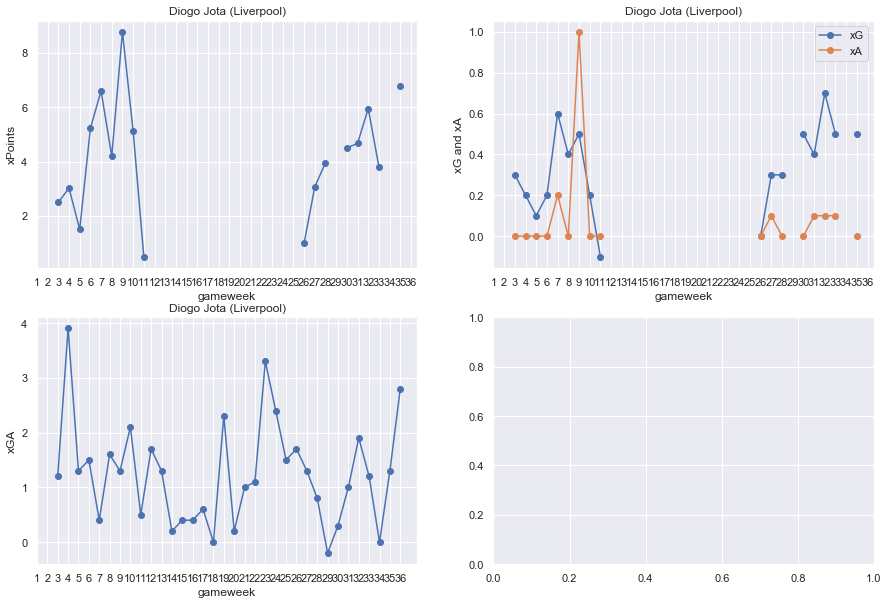

In [21]:
# find player index
name_string = 'Jota'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [32]:
# find player index
df.loc[df['web_name'].str.contains('Raphinha'),'web_name']

id
570    Raphinha
Name: web_name, dtype: object

In [33]:
my_starting11 = [12,558,16,259,570,302,254,301,388,202,166] #vardy=224, grealish=37, mane=251
my_subs = [597,23,156,74]

In [34]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 59.69996266744048
Expected points next gameweek: 62.91691916696599


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,36.000000,5.0,4.366993,3.173663,3.434654,4.163891,4.171215,1.879254
558,Coufal,West Ham,48,32.222222,3.6,3.802060,3.880241,3.493985,4.463545,4.364584,1.735395
16,Holding,Arsenal,43,28.235294,3.4,3.374366,3.142782,3.449270,3.931316,3.628788,1.627264
259,Alexander-Arnold,Liverpool,77,33.863636,4.4,4.934707,7.041294,6.938435,5.220936,5.564066,1.778345
570,Raphinha,Leeds United,55,27.777778,4.5,4.428558,3.906441,4.754781,4.462790,4.889269,1.888344
302,Fernandes,Manchester Utd,114,35.820896,6.7,6.221602,4.982466,5.132085,6.723449,6.277941,1.842680
254,Salah,Liverpool,128,35.238095,6.3,6.041779,6.805299,6.550783,6.271363,6.599986,1.688729
301,Lingard,West Ham,66,13.913043,6.9,4.991482,3.385591,4.832886,5.522147,5.449329,1.942932
388,Kane,Tottenham,118,32.857143,7.0,6.441408,6.900000,7.146656,6.769288,6.361473,1.875166



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,46,24.750000,4.0,3.875936,3.951434,3.933638,3.432726,3.545794,1.807165
23,Smith Rowe,Arsenal,42,18.157895,3.8,3.512878,4.523195,3.798228,3.710415,3.510093,1.714109
156,Keane,Everton,50,33.333333,3.6,3.159694,2.644868,2.661006,3.570408,2.885590,1.413058
74,White,Brighton,45,34.000000,3.0,3.247980,2.639964,3.482118,2.745385,2.874355,1.531113


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)